# 999.01 - Notes on Data Accuracy & Shot Sets

In [1]:
import pathlib
import sys

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.mlab as mlab
from matplotlib_venn import venn3, venn3_circles

%matplotlib inline

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1
#add the 'src' directory to path to import modules
PROJECT_DIR = pathlib.Path.cwd().resolve().parent
sys.path.append(str(PROJECT_DIR))

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

DATA_DIR = PROJECT_DIR / 'data'
SCOPED_DATA_DIR = DATA_DIR / '03-scoped'

In [2]:
league = 'english-premier-league'
load_fp = SCOPED_DATA_DIR / league / str(league + '-scoped-1.csv')
seasons = ['2012-2013']

In [3]:
df = pd.read_csv(load_fp, parse_dates = ['date'], index_col=None)
df = df[df['season'].isin(seasons)].reset_index()
# Calculate Results column
conditions = [df['h_ftgoals'] > df['a_ftgoals'],
              df['h_ftgoals'] == df['a_ftgoals'],
              df['h_ftgoals'] < df['a_ftgoals']]
choices = ['hwin', 'draw', 'awin']
df['result'] = np.select(conditions, choices, default='not-played')
df.head(10)

,index,season,date,h,a,h_ftgoals,a_ftgoals,h_htgoals,a_htgoals,h_corners,h_fouls,h_ycards,h_rcards,h_shots,h_sot,a_corners,a_fouls,a_ycards,a_rcards,a_shots,a_sot,odds_hwin_bbmean,odds_draw_bbmean,odds_awin_bbmean,odds_hwin_bbmax,odds_draw_bbmax,odds_awin_bbmax,odds_hwin_WH,odds_draw_WH,odds_awin_WH,odds_ftgoalsu2.5_bbmax,odds_ftgoalso2.5_bbmax,odds_ftgoalsu2.5_bbmean,odds_ftgoalso2.5_bbmean,heatmap_path,shotmap_path,result
0,1140,2012-2013,2012-08-18,fulham,norwich-city,5.0,0.0,2.0,0.0,6.0,12.0,0.0,0.0,11.0,9.0,3.0,11.0,0.0,0.0,4.0,2.0,1.80,3.59,4.44,1.85,3.82,4.80,1.85,3.3,4.50,2.01,1.95,1.92,1.89,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,hwin
1,1141,2012-2013,2012-08-18,west-ham-united,aston-villa,1.0,0.0,1.0,0.0,6.0,17.0,0.0,0.0,8.0,4.0,4.0,8.0,1.0,0.0,10.0,6.0,2.23,3.32,3.23,2.30,3.46,3.51,2.30,3.2,3.20,1.85,2.10,1.77,2.03,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,hwin
2,1142,2012-2013,2012-08-18,queens-park-rangers,swansea-city,0.0,5.0,0.0,1.0,5.0,11.0,2.0,0.0,20.0,11.0,3.0,14.0,2.0,0.0,12.0,8.0,2.01,3.37,3.76,2.10,3.55,4.20,2.00,3.3,3.80,1.81,2.18,1.73,2.09,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,awin
3,1143,2012-2013,2012-08-18,arsenal,sunderland,0.0,0.0,0.0,0.0,7.0,12.0,0.0,0.0,14.0,4.0,0.0,8.0,0.0,0.0,3.0,2.0,1.40,4.47,8.37,1.44,4.89,9.50,1.44,4.0,8.00,2.15,1.83,2.05,1.76,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,draw
4,1144,2012-2013,2012-08-18,west-bromwich-albion,liverpool,3.0,0.0,1.0,0.0,7.0,10.0,1.0,0.0,15.0,10.0,3.0,11.0,4.0,1.0,14.0,7.0,4.01,3.44,1.93,4.38,3.61,2.00,3.80,3.3,2.00,1.81,2.18,1.74,2.08,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,hwin
5,1145,2012-2013,2012-08-18,newcastle-united,tottenham-hotspur,2.0,1.0,0.0,0.0,3.0,12.0,2.0,0.0,6.0,4.0,5.0,8.0,2.0,0.0,12.0,6.0,2.55,3.32,2.73,2.70,3.47,2.85,2.70,3.0,2.80,2.01,2.00,1.92,1.88,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,hwin
6,1146,2012-2013,2012-08-18,reading,stoke-city,1.0,1.0,0.0,1.0,4.0,9.0,2.0,0.0,9.0,3.0,3.0,14.0,4.0,1.0,6.0,3.0,2.36,3.27,3.03,2.45,3.40,3.26,2.40,3.3,2.90,1.76,2.28,1.67,2.18,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,draw
7,1147,2012-2013,2012-08-19,manchester-city,southampton,3.0,2.0,1.0,0.0,7.0,4.0,1.0,0.0,20.0,15.0,3.0,6.0,2.0,0.0,9.0,6.0,1.18,6.78,15.60,1.21,7.55,19.38,1.20,6.0,15.00,2.68,1.56,2.51,1.50,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,hwin
8,1148,2012-2013,2012-08-19,wigan-athletic,chelsea,0.0,2.0,0.0,2.0,7.0,16.0,2.0,0.0,12.0,4.0,1.0,11.0,2.0,0.0,5.0,3.0,6.09,3.84,1.58,6.75,4.00,1.67,5.50,3.6,1.67,2.05,1.93,1.93,1.88,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,awin
9,1149,2012-2013,2012-08-20,everton,manchester-united,1.0,0.0,0.0,0.0,6.0,12.0,1.0,0.0,16.0,7.0,8.0,11.0,2.0,0.0,12.0,7.0,4.18,3.47,1.88,4.45,3.71,1.91,4.33,3.3,1.91,1.90,2.08,1.83,1.97,/data/02-interim/football-data/english-premier...,/data/02-interim/football-data/english-premier...,hwin


## Publicly Available Data

Plenty of historical soccer results are available for free at [www.football-data.co.uk](http://www.football-data.co.uk/englandm.php)

For this data analysis, we will use English Premier League data from 6 seasons; 2012-2013 through to 2017-2018.

This data is very clean - no gaps, uses consistent team names. Accuracy is somewhat suspect, as dicussed below

The first 2 seasons will be used for exploratory data analysis

The second 2 seasons will be used for model fitting

The fifth season will be used for validation, and the sixth season will be held out as a test set

Column Key
+ h: home team
+ a: away team
+ h_goals: home team goals scored
+ a_goals: away team goals scored
+ h_shots: home team total shots
+ a_shots: away team total shots
+ h_sot: home team shots on target
+ a_sot: away team shots on target
+ hwin_odds: Pinnacle closing home win decimal odds
+ draw_odds: Pinnacle closing draw decimal odds
+ awin_odds: Pinnacle closing away win decimal odds
+ p_hwin_odds: Normalized implied probability of home win from Pinnacle closing odds
+ p_draw_odds: Normalized implied probability of draw from Pinnacle closing odds
+ p_awin_odds: Normalized implied probability of away win from Pinnacle closing odds
+ result: final match result

Result Key
+ hwin: home team win
+ draw: draw
+ awin: away team win 


## How Good is the Data?

In the fifth match - Newcastle vs Spurs - both teams scored. We can take a look at this game at [www.whoscored.com]() and see how the numbers match up to this alternative data source.

![Newcastle vs Tottenham Shotmap](images/2012-2013_Newcastle__Tottenham.png "Chalkboard")

The whoscored data shows Newcastle as:
+ 7 total shots compared to 6 h_shots
+ 2 Goals compared to 2 h_goals
+ 3 Shots on Target compared to 4 h_sot
+ 2 Shots off Target
+ 0 Shots off woodwork
+ 2 Shots blocked

Spurs look like:
+ 15 total shots compared to 12 a_shots
+ 1 Goal compared to 1 h_goals
+ 4 Shots on Target compared to 6 a_sot
+ 7 Shots off Target
+ 2 Shots off woodwork
+ 4 Shots blocked

I cannot explain these discrepancies. I have more faith in the whoscored data, purely because the diagram seems to be highly credible. Whether this is fair, or not, I don't know.

The stats are similar to each other - they are close enough to start this project, and in a future project, I will look further into the question of accuracy

## Shots, Shots on Target, Goals; as Sets

I think the data can be seen as a series of 3 nested sets

This is the model that will be assumed for the project

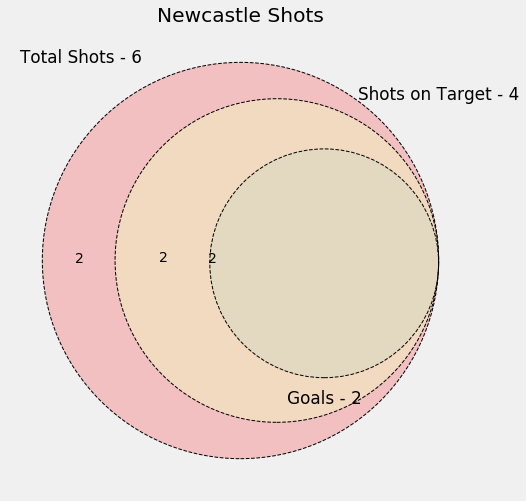

In [4]:
# Newcastle Shots
# 6 Total Shots
set1 = set([1,2,3,4,5,6])
# 4 of the 7 shots were on target
set2 = set([1,2,3,4])
# 2 of the 4 shots on target resulted in a goal
set3 = set([1,2])

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
v = venn3([set1, set2, set3],
          (f'Total Shots - {len(set1)}',
           f'Shots on Target - {len(set2)}',
           f'Goals - {len(set3)}'),
         set_colors=('r', 'y', 'g'),
         alpha=0.2,)
c=venn3_circles([set1, set2, set3], linestyle='dashed', linewidth=1, color="black")
plt.title("Newcastle Shots")
plt.show();